# Becquerel Overview

### Description

Becquerel is a Python package for analyzing nuclear spectroscopic measurements. We wanted to consolodate some tools we end up rewriting often when performing analysis of spectra. We also wanted to replicate some features of PeakEasy (notably fileIO) all within a Python environment.

- Spectrum file type reading and writing
- Operations on spectra
  - rebinning
  - combination / subtraction
- Fitting spectral features
- Performing detector calibrations
- Interpreting measurement results

It is intended to be general-purpose enough that it can be useful to anyone from an undergraduate taking a laboratory course to the advanced researcher.

### Distribution:

- Open source: https://github.com/lbl-anp/becquerel
- Continuous Integration: https://travis-ci.org/lbl-anp/becquerel
- Modified (for UC Regents) [3 Clause BSD License](https://opensource.org/licenses/BSD-3-Clause) 
- <img src="https://upload.wikimedia.org/wikipedia/commons/b/bf/License_icon-bsd.svg" alt="BSD" style="width: 30px;" align="left"/>

### Installation

- Python 2/3 package
- Normal scientific Python distribution dependancies with a couple extras:
    - beautifulsoup4
    - future
    - html5lib
    - lxml
    - matplotlib
    - numba
    - numpy
    - pandas
    - python-dateutil
    - requests
    - scipy
    - setuptools
    - six
    - uncertainties

```bash
git clone https://github.com/lbl-anp/becquerel.git
cd becquerel
pip install -r requirements.txt
python setup.py install
```

### Contributors as of December 2018:

- bplimley
- markbandstra
- thjoshi
- jccurtis
- chunhochow
- alihanks
- cosama

In [1]:
%pylab inline
import pandas as pd
import becquerel as bq
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


# 1. `bq.Spectrum`

The core class in `bq` is `Spectrum`. This contains a variety of tools for handling **single spectrum** data.

In [2]:
# print(bq.Spectrum.__doc__)

In [3]:
# print(bq.Spectrum.__init__.__doc__)

## 1.1 From scratch

In [4]:
c, _ = np.histogram(np.random.poisson(50, 1000), bins=np.arange(101))
spec = bq.Spectrum(counts=c, livetime=60.)
spec

becquerel.Spectrum
    start_time:     None
    stop_time:      None
    realtime:       None
    livetime:       60.0
    is_calibrated:  False
    num_channels:   100
    gross_counts:   1000+/-33
    gross_cps:      16.7+/-0.5
    filename:       None

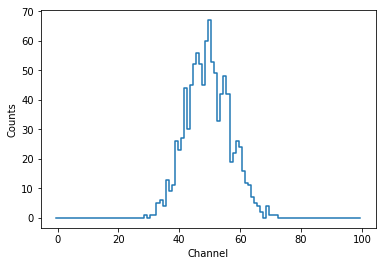

In [5]:
spec.plot(xmode='channels')

In [6]:
try:
    spec.plot(xmode='energy')
except bq.PlottingError as e:
    print('ERROR:', e)
    plt.close('all')

ERROR: Spectrum is not calibrated, however x axis was requested as energy


## 1.2 Energy Calibration Models

Base class for energy calibration models: `EnergyCalBase`. Currently implmented:

- `LinearEnergyCal`

becquerel.Spectrum
    start_time:     None
    stop_time:      None
    realtime:       None
    livetime:       60.0
    is_calibrated:  True
    num_channels:   100
    gross_counts:   1000+/-33
    gross_cps:      16.7+/-0.5
    filename:       None


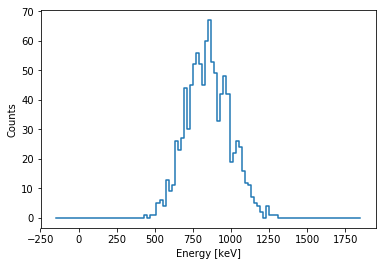

In [7]:
chlist = (40, 80)
kevlist = (661.7, 1460.83)
cal = bq.LinearEnergyCal.from_points(chlist=chlist, kevlist=kevlist)
cal.update_fit()
spec.apply_calibration(cal)
print(spec)
spec.plot(xmode='keV')

In [8]:
# New spec
c, _ = np.histogram(np.random.poisson(50, 1000), bins=np.arange(101))
spec2 = bq.Spectrum(counts=c, livetime=60.)
spec2

becquerel.Spectrum
    start_time:     None
    stop_time:      None
    realtime:       None
    livetime:       60.0
    is_calibrated:  False
    num_channels:   100
    gross_counts:   1000+/-32
    gross_cps:      16.7+/-0.5
    filename:       None

In [9]:
spec2.calibrate_like(spec)
spec2

becquerel.Spectrum
    start_time:     None
    stop_time:      None
    realtime:       None
    livetime:       60.0
    is_calibrated:  True
    num_channels:   100
    gross_counts:   1000+/-32
    gross_cps:      16.7+/-0.5
    filename:       None

## 1.3 From File

`becquerel` currently provides parsers for:

- `SPE`
- `SPC`
- `CNF`

In [10]:
spec = bq.Spectrum.from_file('../tests/samples/1110C NAA cave pottery.Spe')
spec

SpeFile: Reading file ../tests/samples/1110C NAA cave pottery.Spe


becquerel/parsers/spe_file.py:148: SpectrumFileParsingWarning: SpeFile has $PRESETS field, skipping 3 lines
  SpectrumFileParsingWarning)


becquerel.Spectrum
    start_time:     2017-04-25 12:54:27
    stop_time:      2017-04-25 17:30:24
    realtime:       16557.0
    livetime:       16543.0
    is_calibrated:  True
    num_channels:   16384
    gross_counts:   (3.047+/-0.006)e+05
    gross_cps:      18.419+/-0.034
    filename:       ../tests/samples/1110C NAA cave pottery.Spe

In [11]:
spec.is_calibrated

True

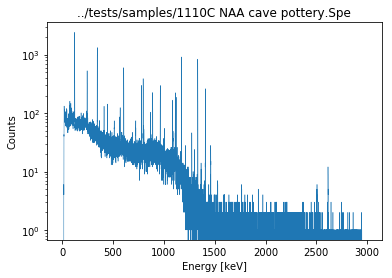

In [12]:
spec.plot(yscale='log', linewidth=0.5, ymode='counts')

In [13]:
%%capture
spec = bq.Spectrum.from_file('../tests/samples/01122014152731-GT01122014182338-GA37.4963000N-GO122.4633000W.cnf')

In [14]:
spec

becquerel.Spectrum
    start_time:     2014-01-12 15:12:28.125000
    stop_time:      2014-01-12 15:26:37.635000
    realtime:       849.5099998999999
    livetime:       841.4199999
    is_calibrated:  True
    num_channels:   4096
    gross_counts:   (6.837+/-0.008)e+05
    gross_cps:      812.5+/-1.0
    filename:       ../tests/samples/01122014152731-GT01122014182338-GA37.4963000N-GO122.4633000W.cnf

In [15]:
%%capture
spec = bq.Spectrum.from_file('../tests/samples/Alcatraz14.Spc')

In [16]:
spec

becquerel.Spectrum
    start_time:     2012-09-17 13:41:07
    stop_time:      2012-09-17 13:41:07
    realtime:       905.0
    livetime:       900.0
    is_calibrated:  True
    num_channels:   8192
    gross_counts:   (1.330+/-0.004)e+05
    gross_cps:      147.8+/-0.4
    filename:       ../tests/samples/Alcatraz14.Spc

## 1.4 Background Subtraction

In [17]:
spec = bq.Spectrum.from_file('../tests/samples/1110C NAA cave pottery.Spe')
print(spec)
bkg = bq.Spectrum.from_file('../tests/samples/1110C NAA cave background May 2017.spe')
print(bkg)

SpeFile: Reading file ../tests/samples/1110C NAA cave pottery.Spe
becquerel.Spectrum
    start_time:     2017-04-25 12:54:27
    stop_time:      2017-04-25 17:30:24
    realtime:       16557.0
    livetime:       16543.0
    is_calibrated:  True
    num_channels:   16384
    gross_counts:   (3.047+/-0.006)e+05
    gross_cps:      18.419+/-0.034
    filename:       ../tests/samples/1110C NAA cave pottery.Spe
SpeFile: Reading file ../tests/samples/1110C NAA cave background May 2017.spe
becquerel.Spectrum
    start_time:     2017-04-26 11:05:11
    stop_time:      2017-05-01 12:43:34
    realtime:       437903.0
    livetime:       437817.0
    is_calibrated:  True
    num_channels:   16384
    gross_counts:   (1.0529+/-0.0010)e+06
    gross_cps:      2.4049+/-0.0023
    filename:       ../tests/samples/1110C NAA cave background May 2017.spe


In [18]:
bkgsub = spec - bkg
print('Total pottery countrate:    {:6.3f}'.format(np.sum(spec.cps)))
print('Total background countrate: {:6.3f}'.format(np.sum(bkg.cps)))
print('Total subtracted countrate: {:6.3f}'.format(np.sum(bkgsub.cps)))

becquerel/core/spectrum.py:556: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  'have been converted to CPS', SpectrumWarning)


Total pottery countrate:    18.419+/- 0.034
Total background countrate:  2.405+/- 0.002
Total subtracted countrate: 16.014+/- 0.034


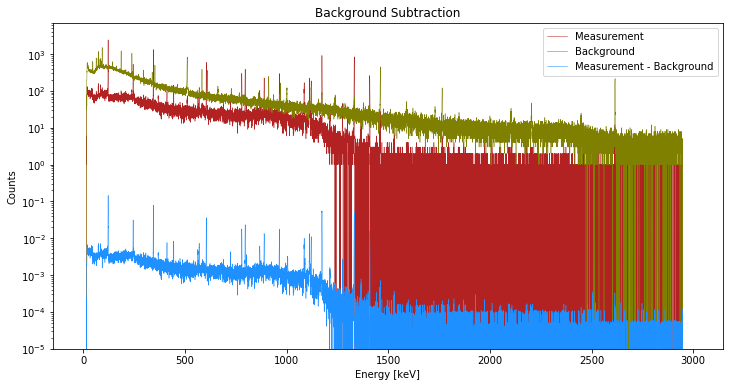

In [19]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax = spec.plot(color='firebrick', linewidth=0.5, yscale='log', ax=ax, label='Measurement')
bkg.plot(ax=ax, color='olive', linewidth=0.5, label='Background')
bkgsub.plot(ax=ax, color='dodgerblue', linewidth=0.5, label='Measurement - Background')
ax.set_ylim(bottom=1e-5)
ax.set_title('Background Subtraction')
ax.legend()

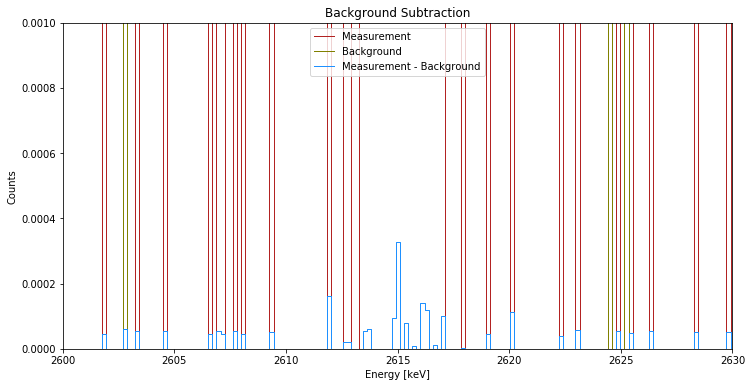

In [20]:
# Is there any Tl-208 in the background-subtracted spectrum?
fig, ax = plt.subplots(1, figsize=(12, 6))
ax = spec.plot(color='firebrick', linewidth=1, yscale='linear', ax=ax, label='Measurement')
bkg.plot(ax=ax, color='olive', linewidth=1, label='Background')
bkgsub.plot(ax=ax, color='dodgerblue', linewidth=1, label='Measurement - Background')
ax.set_ylim(bottom=1e-5)
ax.set_title('Background Subtraction')
ax.legend()
plt.xlim(2600, 2630)
plt.ylim(0, 0.001);

## 1.5 Rebinning

- deterministic (interpolation): `interpolation`
- stochastic (convert to listmode): `listmode`

In [21]:
spec = bq.Spectrum.from_file('../tests/samples/1110C NAA cave pottery.Spe')
bkg = bq.Spectrum.from_file('../tests/samples/1110C NAA cave background May 2017.spe')
bkg_rebin = bkg.rebin(np.linspace(0., 3000., 16000))

SpeFile: Reading file ../tests/samples/1110C NAA cave pottery.Spe
SpeFile: Reading file ../tests/samples/1110C NAA cave background May 2017.spe


becquerel/core/rebin.py:82: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  RebinWarning)


In [22]:
try:
    bkgsub = spec - bkg_rebin
except bq.SpectrumError as e:
    print('ERROR:', e)

ERROR: Cannot add/subtract spectra of different lengths


In [23]:
spec_rebin = spec.rebin_like(bkg_rebin)

In [24]:
spec_rebin - bkg_rebin

becquerel.Spectrum
    start_time:     None
    stop_time:      None
    realtime:       None
    livetime:       None
    is_calibrated:  True
    num_channels:   15999
    gross_counts:   None
    gross_cps:      16.014+/-0.033
    filename:       None

## 1.6 Scaling

In [25]:
spec = bq.Spectrum.from_file('../tests/samples/1110C NAA cave pottery.Spe')
spec * 2.

SpeFile: Reading file ../tests/samples/1110C NAA cave pottery.Spe


becquerel.Spectrum
    start_time:     None
    stop_time:      None
    realtime:       None
    livetime:       None
    is_calibrated:  True
    num_channels:   16384
    gross_counts:   (6.094+/-0.011)e+05
    gross_cps:      None
    filename:       None

SpeFile: Reading file ../tests/samples/1110C NAA cave background May 2017.spe
becquerel.Spectrum
    start_time:     None
    stop_time:      None
    realtime:       None
    livetime:       None
    is_calibrated:  True
    num_channels:   16384
    gross_counts:   (1.0529+/-0.0010)e+05
    gross_cps:      None
    filename:       None
becquerel.Spectrum
    start_time:     None
    stop_time:      None
    realtime:       None
    livetime:       43781.7
    is_calibrated:  True
    num_channels:   16384
    gross_counts:   (1.0524+/-0.0033)e+05
    gross_cps:      2.404+/-0.008
    filename:       None


(1.3, 50.0)

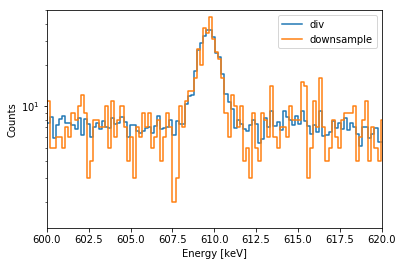

In [26]:
spec = bq.Spectrum.from_file('../tests/samples/1110C NAA cave background May 2017.spe')
spec_div = spec / 10.
print(spec_div)
spec_downsample = spec.downsample(10, handle_livetime='reduce')
print(spec_downsample)

ax = spec_div.plot(label='div', ymode='counts', yscale='log')
spec_downsample.plot(ax=ax, label='downsample', ymode='counts')
ax.legend()
ax.set_xlim(600, 620)
ax.set_ylim(1.3, 5e1)

# 2. Nuclear Data

## 2.1 `bq.Element`

In [27]:
e1 = bq.Element('Cs')
e2 = bq.Element(55)
e3 = bq.Element('55')
print(e1, e2, e3)
print(e1 == e2 == e3)
print('{:%n(%s) Z=%z}'.format(e1))
pprint(e1.__dict__, width=10)

Cesium(Cs) Z=55 Cesium(Cs) Z=55 Cesium(Cs) Z=55
True
Cesium(Cs) Z=55
{'Z': 55,
 'atomic_mass': 132.91,
 'name': 'Cesium',
 'symbol': 'Cs'}


## 2.2 `bq.Isotope`

In [28]:
i1 = bq.Isotope('Cs-137')
i2 = bq.Isotope('137CS')
i3 = bq.Isotope('Cs', 137)
i4 = bq.Isotope('Cesium-137')
i5 = bq.Isotope('137CAESIUM')
print(i1, i2, i3, i4, i5)
print(i1 == i2 == i3 == i4 == i5)

Cs-137 Cs-137 Cs-137 Cs-137 Cs-137
True


Isotope names and properties

In [29]:
iso = bq.Isotope('Tc-99m')
print(iso)
print('{:%n(%s)-%a%m Z=%z}'.format(iso))
pprint(iso.__dict__)
print('half-life: {:.2f} hr'.format(iso.half_life / 3600))

Tc-99m
Technetium(Tc)-99m Z=43
{'A': 99,
 'M': 1,
 'N': 56,
 'Z': 43,
 'atomic_mass': 98,
 'm': 'm',
 'name': 'Technetium',
 'symbol': 'Tc'}
half-life: 6.01 hr


More isotope properties such as half-life, stability, and natural abundance are available:

In [30]:
for a in range(39, 42):
    iso = bq.Isotope('Potassium', a)
    print('')
    print('Isotope: {}'.format(iso))
    print('    Spin-parity: {}'.format(iso.j_pi))
    if iso.abundance is not None:
        print('    Abundance:   {:.2f}%'.format(iso.abundance))
    print('    Stable?      {}'.format(iso.is_stable))
    if not iso.is_stable:
        print('    Half-life:   {:.3e} years'.format(iso.half_life / 365.25 / 24 / 3600))
        print('    Decay modes: {}'.format(iso.decay_modes))


Isotope: K-39
    Spin-parity: 3/2+
    Abundance:   93.26+/-0.00%
    Stable?      True

Isotope: K-40
    Spin-parity: 4-
    Abundance:   0.01+/-0.00%
    Stable?      False
    Half-life:   1.248e+09 years
    Decay modes: (['B-', 'EC'], [89.28, 10.72])

Isotope: K-41
    Spin-parity: 3/2+
    Abundance:   6.73+/-0.00%
    Stable?      True


## 2.3 `bq.IsotopeQuantity`

Source activity on a given date

Here's a check source activity on today's date:

In [31]:
ba133_chk = bq.IsotopeQuantity('ba133', date='2013-05-01', uci=10.02)
ba133_chk.uci_now()

6.945778364168987

Or for another date:

In [32]:
ba133_chk.uci_at('2018-02-16')

7.311855859452171

## 2.4 `bq.materials`

Access the [NIST X-ray mass attenuation coefficients database](https://www.nist.gov/pml/x-ray-mass-attenuation-coefficients) for [elements](https://physics.nist.gov/PhysRefData/XrayMassCoef/tab1.html) and [compounds](https://physics.nist.gov/PhysRefData/XrayMassCoef/tab2.html).

In [33]:
elem_dat = bq.materials.fetch_element_data()
elem_dat.head()

,Z,Symbol,Element,Z_over_A,I_eV,Density
0,1,H,Hydrogen,0.99212,19.2,0.000084
1,2,He,Helium,0.49968,41.8,0.000166
2,3,Li,Lithium,0.43221,40.0,0.534000
3,4,Be,Beryllium,0.44384,63.7,1.848000
4,5,B,Boron,0.46245,76.0,2.370000


In [34]:
comp_dat = bq.materials.fetch_compound_data()
comp_dat.head()

,Material,Z_over_A,I_eV,Density,Composition_Z,Composition_symbol
0,A-150 Tissue-Equivalent Plastic,0.54903,65.1,1.127000,"[1: 0.101330, 6: 0.775498, 7: 0.035057, 8: 0.0...","[H 0.101330, C 0.775498, N 0.035057, O 0.05231..."
1,Adipose Tissue (ICRU-44),0.55579,64.8,0.950000,"[1: 0.114000, 6: 0.598000, 7: 0.007000, 8: 0.2...","[H 0.114000, C 0.598000, N 0.007000, O 0.27800..."
2,"Air, Dry (near sea level)",0.49919,85.7,0.001205,"[6: 0.000124, 7: 0.755268, 8: 0.231781, 18: 0....","[C 0.000124, N 0.755268, O 0.231781, Ar 0.012827]"
3,Alanine,0.53876,71.9,1.424000,"[1: 0.079192, 6: 0.404437, 7: 0.157213, 8: 0.3...","[H 0.079192, C 0.404437, N 0.157213, O 0.359157]"
4,B-100 Bone-Equivalent Plastic,0.52740,85.9,1.450000,"[1: 0.065473, 6: 0.536942, 7: 0.021500, 8: 0.0...","[H 0.065473, C 0.536942, N 0.021500, O 0.03208..."


## 2.5 `bq.nndc`

Tools to query the [National Nuclear Data Center databases](https://www.nndc.bnl.gov/nudat2/) to obtain decay radiation, branching ratios, and many other types of nuclear data.

Here are the gamma-ray lines above 5% branching ratio from Co-60:

In [35]:
rad = bq.nndc.fetch_decay_radiation(nuc='Co-60', type='Gamma', i_range=(5, None))
cols = ['Z', 'Element', 'A', 'Decay Mode', 'Radiation', 'Radiation Energy (keV)',
        'Radiation Intensity (%)', 'Energy Level (MeV)']
display(rad[cols])

,Z,Element,A,Decay Mode,Radiation,Radiation Energy (keV),Radiation Intensity (%),Energy Level (MeV)
0,27,CO,60,IT,G,6.915,9.1+/-0.4,0.058603+/-0.000007
1,27,CO,60,IT,G,6.93,18.0+/-0.8,0.058603+/-0.000007
2,27,CO,60,B-,G,1173.2280+/-0.0030,99.850+/-0.030,0
3,27,CO,60,B-,G,1332.492+/-0.004,99.9826+/-0.0006,0


In [36]:
# NNDC nuclear wallet cards are used by bq.Isotope but can be accessed directly like this:
data = bq.nndc.fetch_wallet_card(
    z_range=(19, 19),
    a_range=(37, 44),
    elevel_range=(0, 0),  # ground states only
)
display(data)

,Z,Element,A,m,M,N,JPi,Energy Level (MeV),Decay Mode,Branching (%),Mass Excess (MeV),T1/2 (txt),T1/2 (s),Abundance (%)
0,19,K,37,,0,18,3/2+,0.0,EC,100.00,-24.80020+/-0.00009,1.226 S 0.007,1.226000e+00,None
1,19,K,38,,0,19,3+,0.0,EC,100.00,-28.80076+/-0.00019,7.636 M 0.018,4.581600e+02,None
2,19,K,39,,0,20,3/2+,0.0,,NaN,-33.807191+/-0.000005,STABLE,inf,93.258+/-0.004
3,19,K,40,,0,21,4-,0.0,EC,10.72,-33.53549+/-0.00006,1.248E+9 Y 0.003E+9,3.938000e+16,0.01170+/-0.00010
4,19,K,40,,0,21,4-,0.0,B-,89.28,-33.53549+/-0.00006,1.248E+9 Y 0.003E+9,3.938000e+16,0.01170+/-0.00010
5,19,K,41,,0,22,3/2+,0.0,,NaN,-35.559543+/-0.000004,STABLE,inf,6.730+/-0.004
6,19,K,42,,0,23,2-,0.0,B-,100.00,-35.02203+/-0.00011,12.355 H 0.007,4.447800e+04,None
7,19,K,43,,0,24,3/2+,0.0,B-,100.00,-36.5754+/-0.0004,22.3 H 0.1,8.028000e+04,None
8,19,K,44,,0,25,2-,0.0,B-,100.00,-35.7815+/-0.0004,22.13 M 0.19,1.327800e+03,None


## 2.6 `bq.xcom`

The [NIST XCOM photon cross sections database](https://www.nist.gov/pml/xcom-photon-cross-sections-database) can be [queried](https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html) in `becquerel`.

For example, here is how to access the cross section data for an element (Pb)

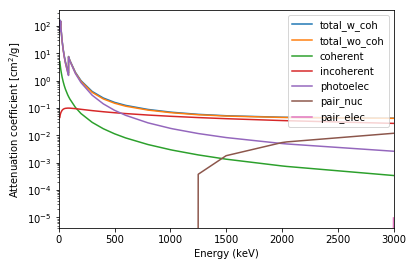

In [37]:
# query XCOM by element symbol
data = bq.xcom.fetch_xcom_data('Pb', e_range_kev=[10., 3000.])

plt.figure()
for field in ['total_w_coh', 'total_wo_coh', 'coherent', 'incoherent',
              'photoelec', 'pair_nuc', 'pair_elec']:
    plt.semilogy(data.energy, data[field], label=field)
plt.xlim(0, 3000)
plt.xlabel('Energy (keV)')
plt.ylabel(r'Attenuation coefficient [cm$^2$/g]')
plt.legend()
plt.show()

# 3. Features in development (contributions welcome!)

* reading additional `Spectrum` file types (N42, CHN, CSV)
* writing `Spectrum` objects to various standard formats
* fitting spectral features (e.g., gaussian lines with different background models)
* pypi.python.org registration ...